<a href="https://colab.research.google.com/github/asmahassouna/rep1/blob/main/lin_reg_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor(103.4500, grad_fn=<MseLossBackward0>)
epoch 0, loss 103.45000457763672
tensor(8.4767, grad_fn=<MseLossBackward0>)
epoch 1, loss 8.476701736450195
tensor(0.7296, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.7295953631401062
tensor(0.0973, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.09726250916719437
tensor(0.0453, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.0452633872628212
tensor(0.0406, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.04060502350330353
tensor(0.0398, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.0398128479719162
tensor(0.0393, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.039340708404779434
tensor(0.0389, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.03889911249279976
tensor(0.0385, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.03846452385187149
tensor(0.0380, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.038035064935684204
tensor(0.0376, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.037610314786434174
tensor(0.0372, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.037190288305282

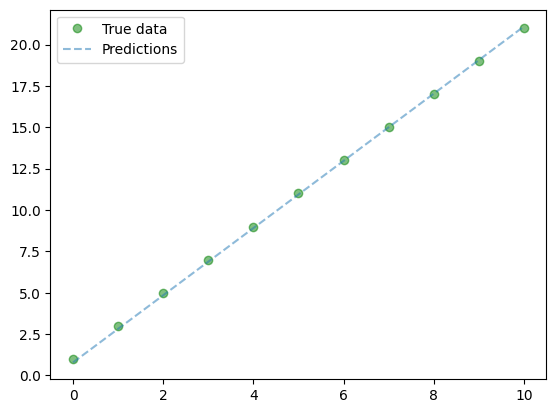

In [3]:
#Linear Regression is an approach that tries to find a linear relationship between a dependent variable and an independent variable by minimizing the distance as shown below.
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1) #transformer l'array en un tab d'une colonne et de n lignes

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

#Once we have created the dataset,
#we can start writing the code for our model.
#First thing will be to define the model architecture.

#Etapes Creating Models in PyTorch:
#1- Create a Class
#2- Declare your Forward Pass
#3- Tune the HyperParameters

import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module): #"linearRegression" hérite de  "torch.nn.Module"
    def __init__(self, inputSize, outputSize): # paramètres d'instanciation: inputSize, outputSize
      # Calling Super Class's constructor
        super(linearRegression, self).__init__()  #
      # nn.Linear is defined in nn.Module
        self.linear = torch.nn.Linear(inputSize, outputSize)#L'attribut de la class est:linear (instance de la Classe Linear)

    def forward(self, x):
      # Here the forward pass is simply a linear function
        out =  self.linear(x)
        return out



#Etapes
#1- Create instance of model
#2- Select Loss Criterion
#3- Choose Hyper Parameters

inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 100

model = linearRegression(inputDim, outputDim) #instanciation de la classe linearRegression
##### For GPU #######
#if torch.cuda.is_available():
#    model.cuda()

#After that, we initialize
# the loss (Mean Squared Error, MSE) and
# optimization (Stochastic Gradient Descent, SGD) functions
#that we’ll use in the training of this model.

criterion = torch.nn.MSELoss() #SOM{(Y'-Y)^2}
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#After completing all the initializations, we can now begin to train our model.

for epoch in range(epochs):
    # Converting inputs and labels to Variable

    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train)) #labels: la liste réele des outputs

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs) #la liste d'outputs calculé par le model

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))


#Now that our Linear Regression Model is trained, let’s test it.
#Since it’s a very trivial model, we’ll test this on our existing dataset and also plot to see the original vs the predicted outputs.

with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy() #tester le model (déjà entrainé), sur les donnée existante x_train (les même data d'entariement !! ,biased)
    print(predicted)

import matplotlib.pyplot as plt
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()